Problem: 
Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday
period , identify which factors predict future user
adoption .

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
#Loading data
usage = pd.read_csv('takehome_user_engagement.csv')
users = pd.read_csv('takehome_users.csv', encoding='latin')

In [4]:
usage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [7]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


There are missing values in the features: last_session_creation_time and Invited_by_user_id

Utilizing usage data to identify users who log on at least 3 times in a seven day period. Then using user_id's we will use the main dataframe to identify features that predict if the user will be active.

In [9]:
#sorting users who appear at least 3 times
engage = usage.groupby('user_id').filter(lambda x: len(x) >=3)

In [10]:
engage.reset_index(drop=True, inplace = True)

In [11]:
#This loops through the dataframe, creates a week from a date and then checks if the next two dates fall within that time. The output is the user_id to a list
active=0
active_users=[]
for i in range(len(engage)-2):
    user = engage['user_id'][i]
    if user != active and user == engage['user_id'][i+2]:
        st = pd.Timestamp(engage['time_stamp'][i])
        et = st + pd.Timedelta('7D')
        if st < pd.Timestamp(engage['time_stamp'][i+1]) < et and st < pd.Timestamp(engage['time_stamp'][i+2]) <et:
            active_users.append(user)
            active = user

In [12]:
len(active_users)

1602

In [13]:
y = pd.Series(np.random.randn(len(users)))
n =0
for i in range(len(users)):
    if users['object_id'][i] == active_users[n]:
        y[i] =1
        n = n+1
        if n > len(active_users)-1:
            n = n-1
    else:
        y[i] = 0
y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [14]:
users1 = pd.DataFrame(y,columns = ['active_users'])

In [15]:
df = pd.concat([users, users1], axis=1)

In [16]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_users
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [17]:
#This is to turn the invited column into simple binary as 'invited' or 'not'
inv = pd.Series(np.random.randn(len(df)))
for i in range(len(df)):
    if df['invited_by_user_id'][i] >=1:
        inv[i] = 1
    else:
        inv[i] = 0
df2 = pd.DataFrame(inv, columns = ['invited'])
df = pd.concat([df,df2], axis=1)

In [18]:
inv.value_counts()

1.0    6417
0.0    5583
dtype: int64

<AxesSubplot:xlabel='last_session_creation_time', ylabel='active_users'>

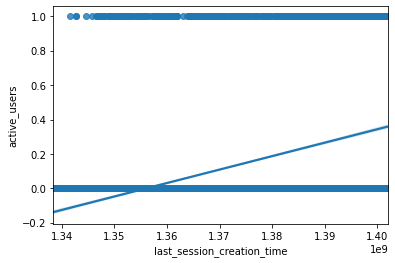

In [19]:
sns.regplot(y=df['active_users'], x=df['last_session_creation_time'], fit_reg=True)

In [20]:
df['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['ORG_INVITE','GUEST_INVITE','PERSONAL_PROJECTS','SIGNUP','SIGNUP_GOOGLE_AUTH'])

LabelEncoder()

In [22]:
creation = le.transform(df['creation_source'])

In [23]:
df3 = pd.DataFrame(creation, columns=['creation'])

In [24]:
df = pd.concat([df,df3],axis=1)

In [25]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
y = df['active_users']
x = df[['creation','last_session_creation_time','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
model = XGBClassifier()
model.fit(X_train, y_train)

C:\Users\dongh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:04:23] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Text(0, 0.5, 'Feature Importance Score')

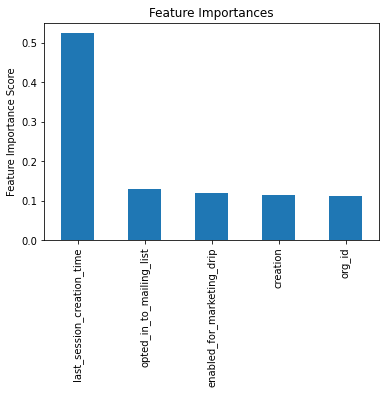

In [29]:
feat_imp = pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [30]:
#making predictions
y_pred=model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" %(accuracy*100.0))

Accuracy: 91.09%


The accuracy of the model is 91 percent. It appears that the most critical feature for for the prediciton is "last session creation time'